<a href="https://colab.research.google.com/github/willclopes/Portfolio-Data-Science/blob/master/5_1An%C3%A1lise_de_dados_restaurantes_zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados restaurantes Zomato



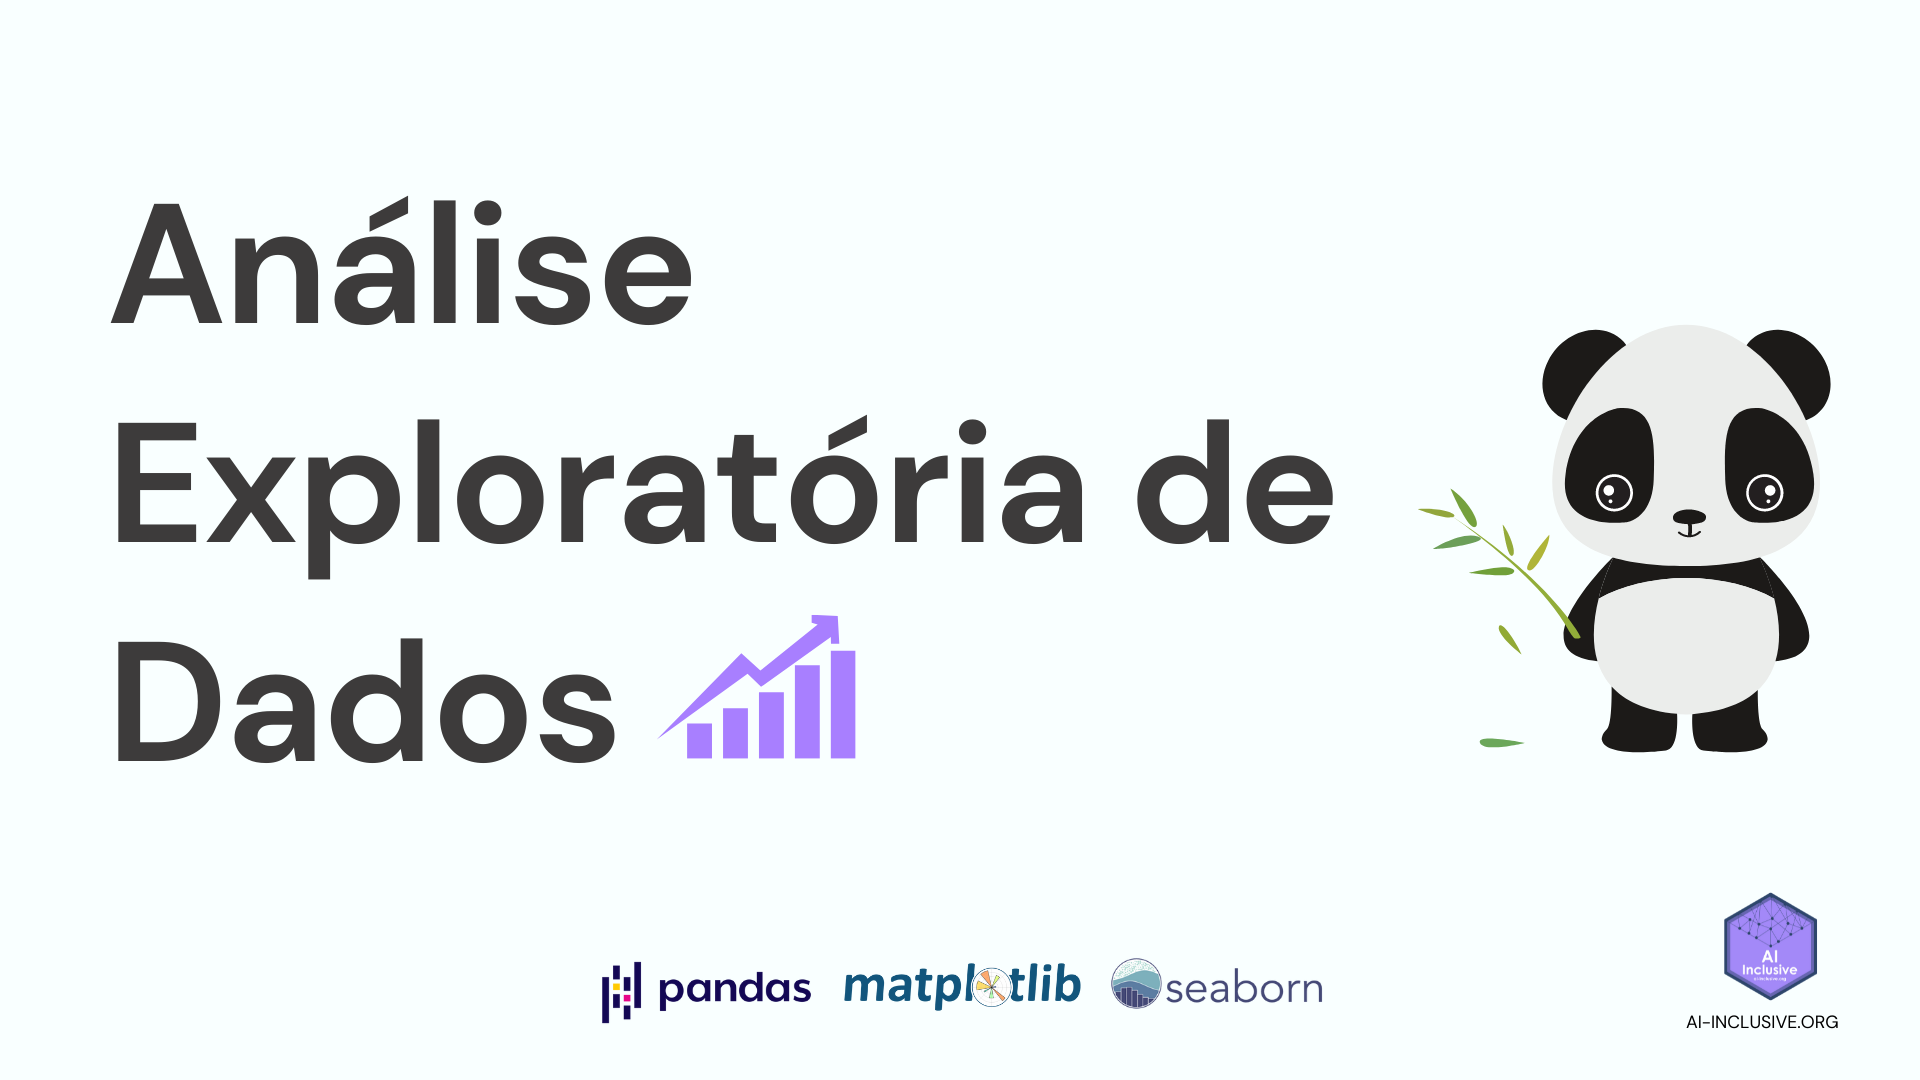

## Contexto

O turismo e uma das atividades economicas mais promissoras atualmente e o sucesso dessa atividade depende de varios setores de servicos, dentre eles o de restaurantes. 

Diversos estudos tem sido desenvolvidos com o objetivo de avaliar a qualidade dos servicos em restaurantes, buscando identificar as necessidades, as expectativas e os atributos mais importantes do servico oferecido segundo o ponto de vista dos clientes. 

Entretanto, geralmente estes estudos consideram dimensoes e atributos diferenciados, com foco em estabelecimentos com caracteristicas especificas, como por exemplo, restaurantes Zomato.

A Zomato é uma startup indiana de restaurantes para quem quer sair para jantar, buscar comida ou pedir em casa na Índia, Brasil, Portugal, Turquia, Indonésia, Nova Zelândia, Itália, Filipinas, África do Sul, Sri Lanka, Catar, Emirados Árabes Unidos, Reino Unido, Estados Unidos, Austrália e Canadá. O site estava posicionado no ranking Alexa como 99 na Índia e 595 no mundo em Outubro de 2015. Ela possui parcerias com 350 mil restaurantes e cafés em 526 cidades ([Fonte](https://www.ecommercebrasil.com.br/noticias/entrega-zomato-avaliacao-ipo/)).

Essa EDA tem como objetivo **avaliar a qualidade** dos restaurantes do Zomato e **ajudar** comunidade a **encontrar os melhores pratos** da região à luz de dimensões e itens inerentes ao segmento, **segundo a percepção dos clientes.**



## Por que monitorar a análise de vendas?



## O que é a EDA

A EDA ou análise exploratória de dados é uma etapa importante do aprendizado de máquina que envolve aprender sobre os dados sem gastar muito tempo ou se perder nisso. Nesse processo você se familiariza com a estrutura e as características gerais do conjunto de dados, com os recursos independentes e dependentes e suas interações. Você também terá uma ideia dos processos de limpeza de dados a serem empregados e das possíveis técnicas de modelagem.

## Descrição dos dados e declaração do problema:

Nosso dataset é uma base dados histórica de um aplicativo de restaurantes da Índia chamado Zomato. 

Iremos pré-processar e explorar os dados, em seguida, encontrar algumas informações como:

1. Quais restaurantes mais listados no Zomato?
2. Qual tipo de comida esses restaurantes mais oferecem?
3. Quantos desses restaurantes possuem entrega online?
4. Qual a classificação dos restaurantes de entrega online?
5. Preço X Rating
6. Localização de restaurantes com alta classificação em Nova Delhi
7. Ranking dos Restaurantes

## Detalhes do conjunto de dados:

* Id do restaurante: identificação única de cada restaurante em várias cidades do mundo
* Nome do restaurante: Nome do restaurante
* Código do país: país em que o restaurante está localizado
* Cidade: cidade em que o restaurante está localizado
* Endereço: Endereço do restaurante
* Localidade: localização na cidade
* Localidade Detalhada: Descrição detalhada da localidade -_Longitude: Coordenada de longitude da localização do restaurante
* Latitude: coordenada de latitude da localização do restaurante
* Cozinhas: Cozinhas oferecidas pelo restaurante
* Custo médio para dois: custo para duas pessoas em moedas diferentes 👫
* Moeda: Moeda do país
* Tem reserva de mesa: sim / não
* Tem entrega online: sim / não
* Está entregando: sim / não
* Mudar para o menu de pedidos: sim / não
* Faixa de preço: faixa de preço dos alimentos
* Avaliação agregada: avaliação média de 5
* Cor de avaliação: dependendo da cor de avaliação média
* Texto de classificação: texto com base na classificação da classificação
* Votos: número de avaliações emitidas por pessoas

Você pode ter acesso e acompanhar o conjunto de dados baixando-o [aqui](https://raw.githubusercontent.com/willclopes/Portfolio-Datasets/main/restaurantes-zomato.csv).



---



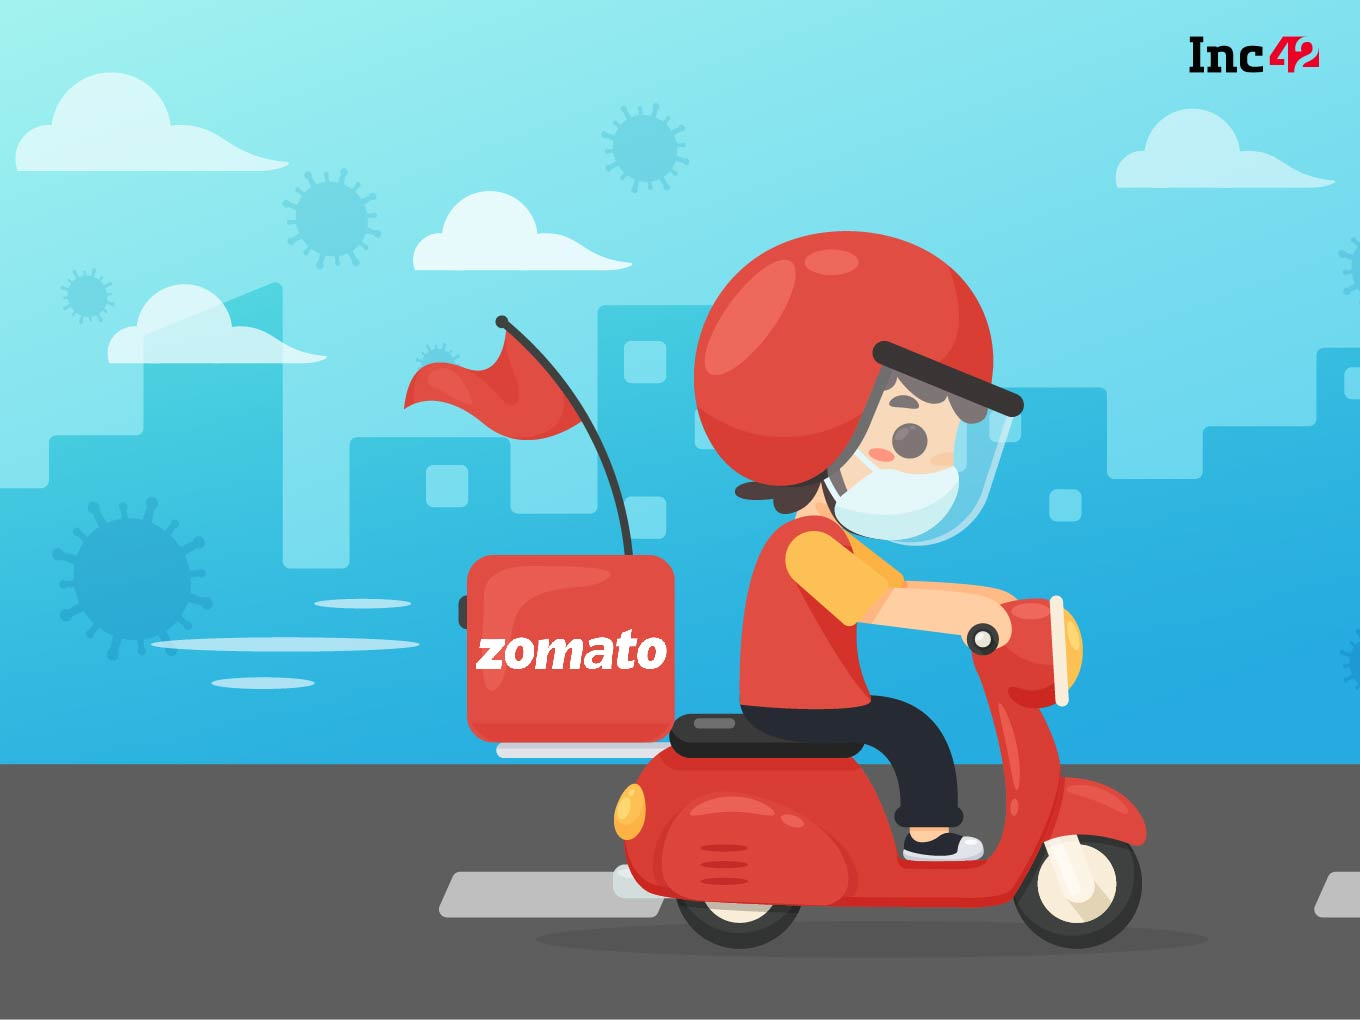

## Importar as Bibliotecas e o DataSet

A primeira etapa é importar as bibliotecas que usaremos em todo o projeto EDA. Em seguida, lemos o **train.csv** que baixei e salvei no meu github. Vamos a EDA no conjunto de **treino** porque ele contém a variável de destino e estamos interessados ​​em compreender os recursos individuais, bem como sua relação com o atributo de destino.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [ ]:
 df = pd.read_csv("https://raw.githubusercontent.com/willclopes/Portfolio-Datasets/main/Restaurantes-zomato/zomato.csv", encoding="ISO-8859-1") #encoding='utf8'

In [ ]:
df.shape

(9551, 21)

In [ ]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

## Exploração de conjunto de dados básicos

### 1. Forma (dimensões) do DataFrame

Um DataFrame tem linhas e colunas, e o atributo **.shape** do Pandas retorna uma tupla de comprimento 2, cada valor mostrando o comprimento de cada dimensão ou (linhas, colunas). 

Podemos ver que o conjunto de dados possui 9551 linhas e 21 colunas. 

### 2. Tipos de dados das várias colunas

Logo após, exibiremos todos os tipos de dados das colunas. Isso nos ajuda a entender o tipo de dados com os quais estamos lidando, em termos de distribuições numéricas e categóricas. Isso também lançará luz sobre alguns dos gráficos e plotagens exploratórias a serem usados.

Vamos dar uma olha nas 5 primeiras linhas do nosso dataset

In [ ]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Agora, vamos ver a quantidade de produtos nulos ou "faltantes"

In [ ]:
nan_values = df.isna()
nan_columns = nan_values.any()

columns_with_nan = df.columns[nan_columns].tolist()
print(columns_with_nan)

['Cuisines']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

As culinárias parecem conter valores nulos. Portanto, qualquer análise posterior envolvendo os valores de NaN de cozinhas deve ser considerada.

Como podemos cofirmar na função **info()** existem 9 informações faltantes no atributo "Cuisines"


### Mesclando datasets

Há um outro arquivo que também está disponível junto com este conjunto de dados.

Vamos mesclar os dois conjuntos de dados. Isso nos ajudará a entender o conjunto de dados por país.

In [ ]:
df1 = pd.read_excel('https://github.com/willclopes/Portfolio-Datasets/blob/main/Restaurantes-zomato/country-code.xlsx?raw=true')
df1.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [ ]:
df2 = pd.merge(df,df1,on='Country Code',how='left')
df2.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


## Análise Exploratória e Visualização

Antes de fazermos perguntas sobre o conjunto de dados, seria útil entender a distribuição geográfica dos restaurantes, entender a classificação, moeda, entrega online, cobertura da cidade ... etc.

### Lista de países em que a pesquisa foi realizada

A pesquisa parece ter se espalhado por 15 países. Isso mostra que a Zomato é uma empresa multinacional com negócios ativos em todos esses países.

In [ ]:
print('Lista de países em que a pesquisa foi realizada - ')
for x in pd.unique(df2.Country): print(x)
print()
print('Total de número de países:', len(pd.unique(df2.Country)))

Lista de países em que a pesquisa foi realizada - 
Phillipines
Brazil
United States
Australia
Canada
Singapore
UAE
India
Indonesia
New Zealand
United Kingdom
Qatar
South Africa
Sri Lanka
Turkey

Total de número de países: 15


In [ ]:
from plotly.offline import init_notebook_mode, plot, iplot

labels = list(df2.Country.value_counts().index)
values = list(df2.Country.value_counts().values)

fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Presença ao redor do mundo",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Países",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}

iplot(fig)

Como a Zomato é uma startup da Índia, faz sentido que tenha o máximo de negócios espalhados por restaurantes na Índia

### Entendendo a avaliação de cor x texto

In [ ]:
df3 = df2.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
df3
df3

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


As informações acima nos ajudam a entender a relação entre avaliação de cor e texto. Concluímos a seguinte cor atribuída às avaliações:

* Classificação 0 - Branco - Sem classificação
* Classificação 1,8 a 2,4 - Vermelho - Ruim
* Classificação 2,5 a 3,4 - Laranja - Média
* Classificação 3,5 a 3,9 - Amarelo - Bom
* Classificação 4,0 a 4,4 - Verde - Muito bom
* Classificação 4,5 a 4,9 - Verde escuro - Excelente


Vamos tentar entender a distribuição da classificação entre os restaurantes

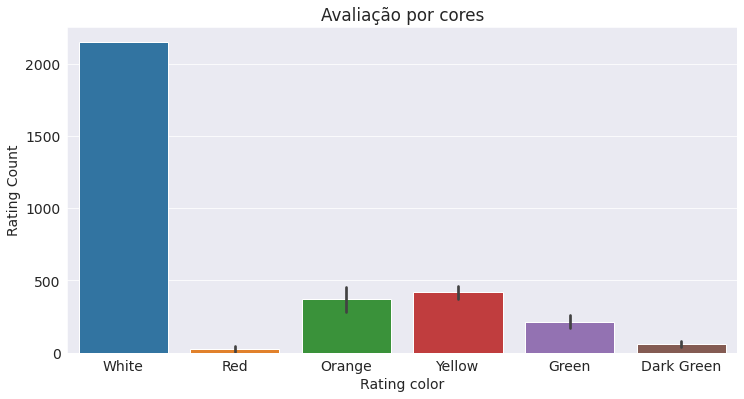

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

plt.figure(figsize=(12,6))
# plt.xticks(rotation=75)
plt.title('Avaliação por cores')
sns.barplot(x=df3['Rating color'], y=df3['Rating Count']);

Interessante, o máximo de restaurantes parece ter ido Sem avaliações. 

Vamos verificar se esses restaurantes pertencem a algum país específico.

In [ ]:
No_rating = df2[df2['Rating color']=='White'].groupby('Country').size().reset_index().rename(columns={0:'Rating Count'})
No_rating

,Country,Rating Count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


A Índia parece ter o máximo de restaurantes sem classificação.

### País e Moeda

In [ ]:
country_currency = df2[['Country','Currency']].groupby(['Country','Currency']).size().reset_index(name='count').drop('count', axis=1, inplace=False)
country_currency.sort_values('Currency').reset_index(drop=True)

,Country,Currency
0,Phillipines,Botswana Pula(P)
1,Brazil,Brazilian Real(R$)
2,Australia,Dollar($)
3,Canada,Dollar($)
4,Singapore,Dollar($)
5,United States,Dollar($)
6,UAE,Emirati Diram(AED)
7,India,Indian Rupees(Rs.)
8,Indonesia,Indonesian Rupiah(IDR)
9,New Zealand,NewZealand($)


A tabela acima exibe o país e a moeda que eles aceitam. Curiosamente, quatro países parecem estar aceitando moeda em dólares.

### Distribuição de entrega online

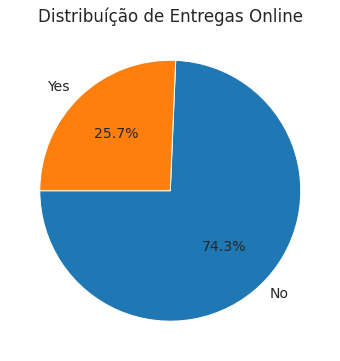

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Distribuíção de Entregas Online')
plt.pie(df2['Has Online delivery'].value_counts()/9551*100, labels=df2['Has Online delivery'].value_counts().index, autopct='%1.1f%%', startangle=180);

Apenas 25% dos restaurantes aceitam entrega online. Esses dados podem ser tendenciosos, pois temos o máximo de restaurantes listados aqui que são da Índia. Talvez a análise sobre a cidade seja mais útil.

### Entrega por cidade

In [ ]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
plt.figure(figsize=(12,6))
# import plotly.plotly as py

labels = list(df2.City.value_counts().head(20).index)
values = list(df2.City.value_counts().head(20).values)

fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Presença do Zomato por cidade",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Cidade",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}
iplot(fig);

<Figure size 864x432 with 0 Axes>

Os dados parecem estar inclinados para Nova Delhi, Gurgaon e Noida. Eu vejo dados mínimos para outras cidades. 

**Portanto, vamos fazer a análise predominantemente em Nova Delhi.**

## Fazendo e respondendo perguntas


Já vimos vários gráficos sobre os restaurantes presentes na pesquisa. Agora vamos fazer algumas perguntas específicas e tentar respondê-las usando operações e visualizações.

### 1. Quais restaurantes mais listados no Zomato?

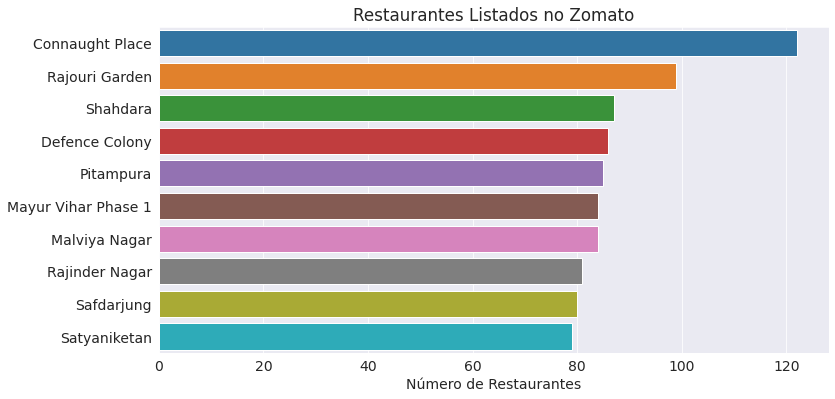

In [ ]:
Delhi = df2[(df2.City == 'New Delhi')]
plt.figure(figsize=(12,6))
sns.barplot(x=Delhi.Locality.value_counts().head(10), y=Delhi.Locality.value_counts().head(10).index)

plt.ylabel(None);
plt.xlabel('Número de Restaurantes')
plt.title('Restaurantes Listados no Zomato');

O lugar de Connaught parece ter um grande número de restaurantes registrados na Zomato, vamos entender os pratos que os restaurantes com melhor classificação têm a oferecer.

### 2. Qual tipo de prato esses restaurantes mais oferecem?

In [ ]:
# Buscando os restaurantes com classificação de 'Excelente' e 'Muito bom'
ConnaughtPlace = Delhi[(Delhi.Locality.isin(['Connaught Place'])) & (Delhi['Rating text'].isin(['Excellent','Very Good']))]

ConnaughtPlace = ConnaughtPlace.Cuisines.value_counts().reset_index()

# Extraindo todos os tipos de pratos em uma única lista
cuisien = []
for x in ConnaughtPlace['index']: 
  cuisien.append(x)

cuisien

['North Indian, Chinese, Italian, Continental',
 'North Indian, Afghani, Mughlai',
 'Japanese',
 'Continental, Italian, Asian, Indian',
 'Chinese',
 'North Indian, European',
 'Modern Indian',
 'Fast Food, American, Burger',
 'Bakery, Desserts, Fast Food',
 'Bakery, Fast Food, Desserts',
 'Ice Cream',
 'North Indian, European, Asian, Mediterranean',
 'North Indian, Continental',
 'South Indian',
 'Continental, American, Asian, North Indian',
 'Healthy Food, Continental, Italian',
 'North Indian, Chinese',
 'North Indian, Chinese, Continental, Italian',
 'Biryani, North Indian, Hyderabadi',
 'Continental, Mediterranean, Italian, North Indian',
 'Continental, North Indian, Chinese, Mediterranean',
 'North Indian',
 'North Indian, Chinese, Italian, American, Middle Eastern',
 'Asian, North Indian',
 'Continental, North Indian, Italian, Asian',
 'Cafe',
 'North Indian, Mediterranean, Asian, Fast Food',
 'North Indian, Italian, Asian, American',
 'Continental, Mexican, Burger, American, Piz

### Nuvem de palavras

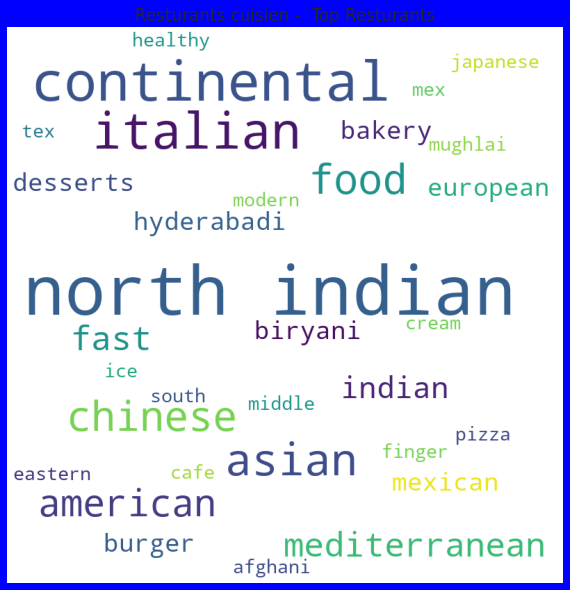

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
  
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterar por meio do arquivo csv
for val in cuisien:
      
    
    val = str(val)
  
    
    tokens = val.split()
      
    # Converte cada token em minúsculas
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plotar a imagem WordCloud                    
plt.figure(figsize = (8, 8), facecolor = 'b', edgecolor='g')
plt.title('Resturants cuisien -  Top Resturants')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

Os restaurantes com melhor classificação parecem estar indo bem na seguinte culinária:

* Norte da índia
* Chinês
* Italiano
* Americano

### 3. Quantos desses restaurantes aceitam entrega online

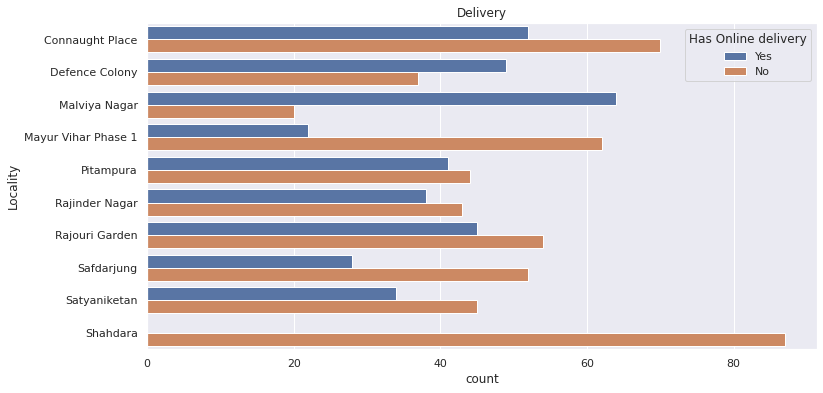

In [ ]:
top_locality = Delhi.Locality.value_counts().head(10)
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,6))
ax = sns.countplot(y= "Locality", hue="Has Online delivery", data=Delhi[Delhi.Locality.isin(top_locality.index)])
plt.title('Delivery');

Parece que em Shahdara as pessoas não gostam de fazer pedidos online, uma realidade diferente de outras localidades, como em Defence Colony e em Malviya Nagar que a entrega online parece estar em alta.

### 4. Qual a classificação dos restaurantes de entrega Online?

Tirando Defence Colony e Malviya Nagar, nas demais localidades as pessoas parecem preferir visitar os restaurantes em vez de pedir comida online.


Agora, vamos entender a classificação desses restaurantes que oferecem entrega online em Defence colony e Malviya Nagar.

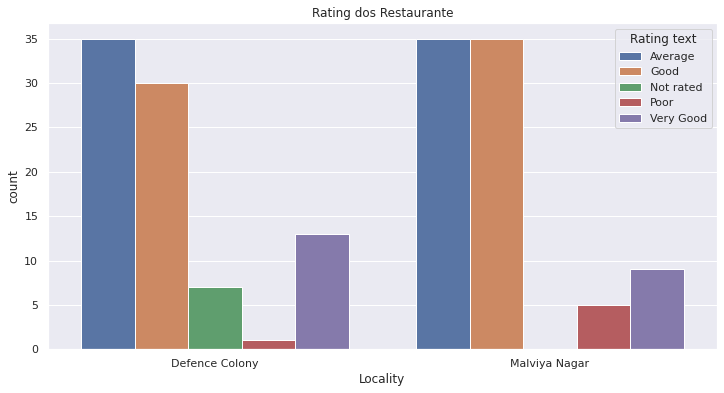

In [ ]:
DefenceColony_MalviNagar = Delhi[Delhi.Locality.isin(['Defence Colony', 'Malviya Nagar'])]
plt.figure(figsize=(12,6))
ax = sns.countplot(x= "Locality", hue="Rating text", data=DefenceColony_MalviNagar)
plt.title('Rating dos Restaurante');

Em Defence Colony parece ter um alto número de restaurantes bem avaliados, e em Malviya Nagar parece se sair melhor em termos de restaurantes bons e médios.

A taxa de restaurantes com 'Fraco' e 'Não avaliado', é muito menor que os restaurantes 'Bom', 'Muito bom' e 'Excelente'. Portanto, as pessoas nessas localidades preferem pedidos online


### 5. Preço X Avaliação

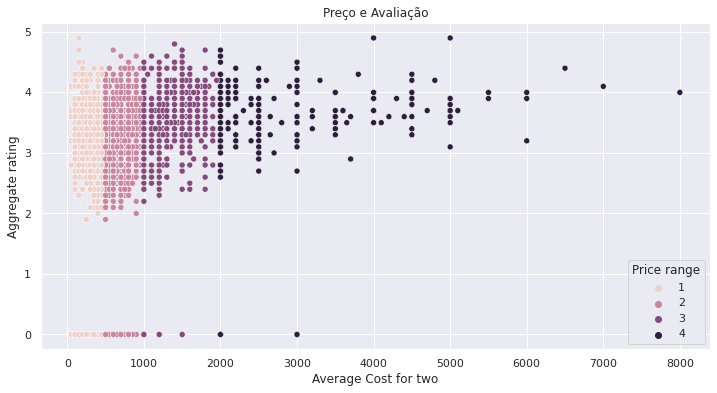

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Average Cost for two", y="Aggregate rating", hue='Price range', data=Delhi)

plt.xlabel("Average Cost for two")
plt.ylabel("Aggregate rating")
plt.title('Preço e Avaliação');

Não há uma definição clara que exista uma relação linear entre preço e avaliação. Por exemplo, restaurantes com boa classificação (como 4–5) têm restaurantes com todas as faixas de preço e espalhados por todo o eixo X

### 6. Localização de restaurantes com alta classificação em Nova Delhi

In [ ]:
Delhi['Rating text'].value_counts()

Average      2495
Not rated    1425
Good         1128
Very Good     300
Poor           97
Excellent      28
Name: Rating text, dtype: int64

In [ ]:
import plotly.express as px
Highly_rated = Delhi[Delhi['Rating text'].isin(['Excellent'])]

fig = px.scatter_mapbox(Highly_rated, lat="Latitude", lon="Longitude", hover_name="City", hover_data=["Aggregate rating", "Restaurant Name"],
                        color_discrete_sequence=["fuchsia"], zoom=10, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(title='Highle rated Resturants Location',
                  autosize=True,
                  hovermode='closest',
                  showlegend=False)
fig.update_layout(
    autosize=False,
    width=800,
    height=500,)

fig.show()

As quatro cidades mencionadas representam cerca de 65% do total de dados disponíveis no conjunto de dados. 

Além dos restaurantes locais bem avaliados, seria interessante saber onde estão os restaurantes conhecidos que são comuns. 

Os vértices através dos quais eles podem ser localizados são -

* Café da manhã
* American Fast Food
* Sorvetes, Batidas e Sobremesas

### 7. Restaurantes comuns

#### 7.1 Café da manhã


In [ ]:
types = {
    "Breakfast and Coffee" : ["Cafe Coffee Day", "Starbucks", "Barista", "Costa Coffee", "Chaayos", "Dunkin' Donuts"],
    "American": ["Domino's Pizza", "McDonald's", "Burger King", "Subway", "Dunkin' Donuts", "Pizza Hut"],
    "Ice Creams and Shakes": ["Keventers", "Giani", "Giani's", "Starbucks", "Baskin Robbins", "Nirula's Ice Cream"]
}

breakfast = Delhi[Delhi['Restaurant Name'].isin(types['Breakfast and Coffee'])]
american = Delhi[Delhi['Restaurant Name'].isin(types['American'])]
ice_cream = Delhi[Delhi['Restaurant Name'].isin(types['Ice Creams and Shakes'])]

breakfast = breakfast[['Restaurant Name','Aggregate rating']].groupby('Restaurant Name').mean().reset_index().sort_values('Aggregate rating',ascending=False)
breakfast

import plotly.express as px

df= breakfast
fig = px.bar(df, y='Aggregate rating', x='Restaurant Name', text='Aggregate rating', title="Café da Manhã")
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(
    autosize=False,
    width=800,
    height=500,)
fig.show()

Os pontos de venda em "Chaayos" estão melhor. 

Parece que as pessoas não gostam muito do café da amanha em "Cofe Coffee Day", pois estão abaixo da média. Eles são obrigados a melhorar seus serviços.

#### 7.2 American Fast Food


In [ ]:
american = american[['Restaurant Name','Aggregate rating']].groupby('Restaurant Name').mean().reset_index().sort_values('Aggregate rating',ascending=False)
american

import plotly.express as px

df= american
fig = px.bar(df, y='Aggregate rating', x='Restaurant Name', text='Aggregate rating', title="Resturantes Fast Food ")
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(
    autosize=False,
    width=800,
    height=500,)

fig.show()

Alguns fatos surpreendentemente 

* O Burger King tem uma classificação mais alta que o McDonald's. 
* O Domino's parece ter recebido a classificação mais baixa. 
* Donuts e Subway da Dunkin são mais bem avaliados em relação à Domino's

#### 7.3 Sorvetes, Batidos e Sobremesas

In [ ]:
ice_cream = ice_cream[['Restaurant Name','Aggregate rating']].groupby('Restaurant Name').mean().reset_index().sort_values('Aggregate rating',ascending=False)
ice_cream

import plotly.express as px

df= ice_cream
fig = px.bar(df, y='Aggregate rating', x='Restaurant Name', text='Aggregate rating', title="Sorvetes, Batidas e Sobremesas")
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(
    autosize=False,
    width=800,
    height=500,)
fig.show()



As marcas estrangeiras parecem estar se saindo melhor do que as marcas locais

## Inferências e conclusões

Tiramos muitas inferências da pesquisa. Aqui está um resumo de alguns deles:
O conjunto de dados está inclinado para a Índia e não representa os dados completos de restaurantes em todo o mundo.

A avaliação de restaurantes é categorizada em seis categorias
* Não avaliado
* Média
* Boa
* Muito bom
* Excelente

O Connaught Palace tem o máximo de restaurantes listados na Zomato, mas em termos de aceitação de entrega online, Defense Colony e Malviya nagar parecem estar melhor.

Os restaurantes com melhor classificação parecem estar obtendo uma classificação melhor nos seguintes pratos:

* Norte da índia
* chinês
* americano
* italiano

Não há relação entre custo e classificação. 

Alguns dos restaurantes mais bem avaliados são de baixo custo e vice-versa.

Em restaurantes comuns, locais para café da manhã e café Os restaurantes indianos parecem ter uma classificação melhor, mas para cadeias de fast food e sorveterias, os restaurantes americanos parecem estar se saindo melhor.

## Referências

* https://pandas.pydata.org/
* https://seaborn.pydata.org/
* https://blog.jovian.ai/
* https://www.kaggle.com/shrutimehta/zomato-restaurants-data
* https://medium.com
